# __Simulating Supply Tutorial__

<br>

Finance 6470: Derivatives Markets<br>
Tyler J. Brough <br>
Last Updated: March 30, 2021 <br>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simulating the Spot Prices for Heating Oil and Gasoline

To simulate a few values from the spot price equation, which is stated as follows:

<br>
<br>

$$
\ln{ \left( \frac{S_{i,t}}{S_{i,t-1}} \right)} = \alpha_{i} (\beta_{i} - S_{i,t-1}) + \varepsilon_{i,t}
$$

<br>
<br>

Where $\varepsilon_{1}, \varepsilon_{2} \sim BVN(0,\sigma_{1}^{2}, 0, \sigma_{2}^{2}, \rho)$. For convenience we can rewrite this as:

<br>
<br>

$$
\ln{(S_{i,t})} = \ln{(S_{i,t-1})} + \alpha_{i} (\beta_{i} - S_{i,t-1}) + \varepsilon_{i,t}
$$

<br>
<br>

In [2]:
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
num_reps = 250

ln_spot1 = np.zeros(num_reps)
ln_spot1[0] = np.log(S1)

z1 = np.random.normal(size=num_reps)

for t in range(1, num_reps):
    ln_spot1[t] = ln_spot1[t-1] + a1 * (b1 - np.exp(ln_spot1[t-1])) + z1[t] * s1

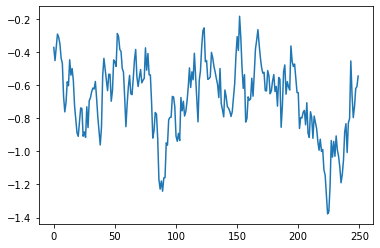

In [3]:
plt.plot(ln_spot1)

## Simulating Correlated Normals

Since the disturbance terms are distributed jointly Normal, we need a way to draw from the BVN distribution. It turns out this is pretty easy. 

<br>

Here are the necessary steps to draw two correlated normal random variables. 

1. Draw $z_{1}$ independently from $N(0,\sigma_{z_{1}})$
2. Next draw $z_{tmp}$ from a standard normal $N(0,1)$
3. Create $z_{2}$ that is correlated with $z_{1}$ according to the correlation coeficient $\rho$

<br>

We can use the following equation to accomplish the third step:

$$
z_{2} = z_{1} * \rho + \sqrt{(1 - \rho^{2})} * z_{tmp} * \sigma_{2}
$$

<br>

We can do this in Python as follows:

In [12]:
s1 = 0.11     ## std of heating oil
s2 = 0.116    ## std of gasoline
rho = 0.705   ## the correlation coef between HO and Gas
num_reps = 10000000

z1 = np.random.normal(size=num_reps) * s1
ztmp = np.random.normal(size=num_reps)
z2 = z1 * rho + np.sqrt((1 - rho**2)) * ztmp * s2

In [13]:
np.corrcoef(z1,z2)

array([[1.        , 0.68591749],
       [0.68591749, 1.        ]])

<br>

I prefer to create a function to handle it: 

<br>

In [14]:
def draw_correlated_normals(mn1 = 0.0, sd1 = 1.0, mn2 = 0.0, sd2 = 1.0, rho = 0.5, num_reps = 100):
    z1 = np.random.normal(size=num_reps, loc=mn1, scale=sd1)
    z2 = np.random.normal(size=num_reps, loc=mn2, scale=sd2)
    z2 = rho * z1 + np.sqrt((1.0 - rho**2.0)) * z2
    
    return (z1,z2)

In [16]:
x1, x2 = draw_correlated_normals(sd1=0.11, sd2=0.116, rho=0.705, num_reps=45000)
np.corrcoef(x1, x2)

array([[1.        , 0.68137477],
       [0.68137477, 1.        ]])

<br>

## Simulating Sport Prices for Oil and Gasoline Jointly

With this in place, we can now simulate spot prices jointly as follows:

<br>

In [18]:
## See B&W Table Panel A on page 145
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
a2 = 0.391
b2 = 0.560
s2 = 0.116
S2 = 0.80
rho = 0.705
num_reps = 45

ln_spot1 = np.zeros(num_reps) ## HO
ln_spot2 = np.zeros(num_reps) ## Gas

ln_spot1[0] = np.log(S1)
ln_spot2[0] = np.log(S2)


z1, z2 = draw_correlated_normals(sd1=s1, sd2=s2, rho=rho, num_reps=num_reps)

for t in range(1, num_reps):
    ln_spot1[t] = ln_spot1[t-1] + a1 * (b1 - np.exp(ln_spot1[t-1])) + z1[t]
    ln_spot2[t] = ln_spot2[t-1] + a2 * (b2 - np.exp(ln_spot2[t-1])) + z2[t] 

ts = pd.DataFrame({'Heating Oil' : ln_spot1, 'Gasoline' : ln_spot2})

<AxesSubplot:>

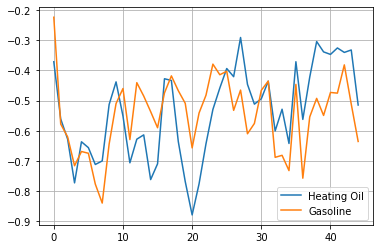

In [19]:
ts.plot(grid=True)

In [22]:
ts.head(5)

,Heating Oil,Gasoline
0,-0.371064,-0.223144
1,-0.561145,-0.578027
2,-0.628127,-0.620687
3,-0.773513,-0.716623
4,-0.636952,-0.669260


In [23]:
ts.tail(5)

,Heating Oil,Gasoline
40,-0.346650,-0.473117
41,-0.325169,-0.475327
42,-0.340018,-0.381428
43,-0.331923,-0.511566
44,-0.514825,-0.635915
